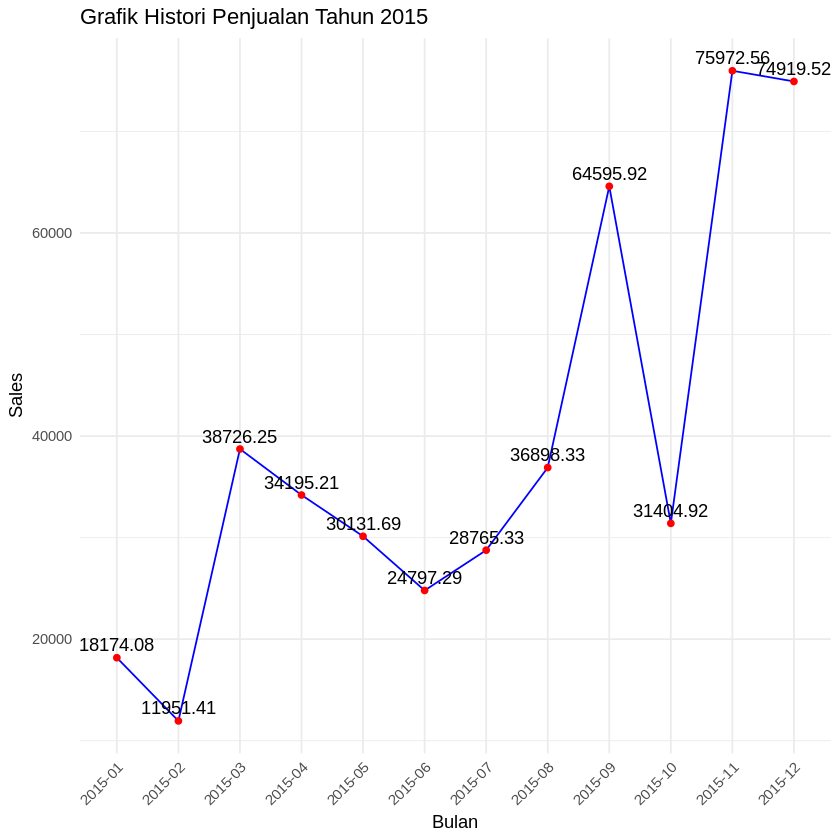

In [ ]:
# Install packages ggplot & diplyr
library(ggplot2)
library(dplyr)
# Baca data dari file CSV
data <- read.csv("https://drive.google.com/uc?export=download&id=11PGuV3ixBvwFTFT-5reIORZgXF2GTGTl")
# Konversi kolom order_date menjadi tipe data Date
data$order_date <- as.Date(data$order_date, format="%Y-%m-%d")

# Filter data penjualan untuk tahun 2015
data_2015 <- data %>%
  filter(format(order_date, "%Y") == "2015")

# mengakumulasi data sales di tahun 2015 setiap bulannya
monthly_sales_2015 <- data_2015 %>%
  group_by(month = format(order_date, "%Y-%m")) %>%
  summarise(total_sales = sum(sales))

# membuat grafik penjualan dengan ggplot
ggplot(data = monthly_sales_2015, aes(x = month, y = total_sales, group = 1)) +
  geom_line(color = "blue") +
  geom_point(color = "red") +
  geom_text(aes(label = sprintf("%.2f",total_sales)), vjust = -0.5, color = "black") +
  labs(title = "Grafik Histori Penjualan Tahun 2015", x = "Bulan", y = "Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))